In [1]:
# Prepare the environment - Load necessary modules and attempt to compile the GrOpt library if it isn't already
import sys
import numpy as np
import matplotlib.pyplot as plt

# Google Colab -- Get gropt and compile it.
#%%capture # Hides long compile output
#!git clone https://github.com/mloecher/gropt
#%cd gropt/python
#!python setup.py build_ext --inplace

# Personal Laptop -- Add the GrOpt path
sys.path.append('/Users/dbe/Documents/GitHub/gropt/python/')

import gropt
from helper_utils import plot_waveform, get_stim, get_min_TE, get_min_TE_diff, get_bval  # Additional GrOpt related functions

# Display plots inline, directly below the code cell
%matplotlib inline

Testing TE = 52.500 28.750 40.625 46.562 43.594 42.109 42.852 42.480 42.295 42.388 42.434 42.457 Final TE = 42.457 ms


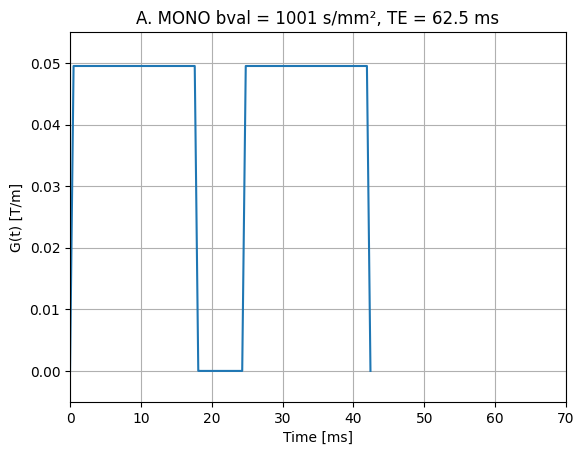

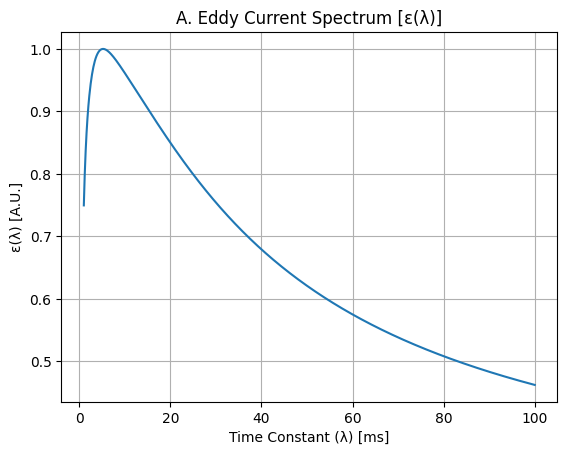

In [13]:
# Define parameters
params = {}
params['mode'] = 'diff_bval'
params['gmax'] = 50e-3         # T/m
params['smax'] = 100           # T/m/s
params['MMT'] = 0              # Moment nulling
params['b'] = 1000             # s/mm^2
params['T_readout'] = 0        # ms
params['T_90'] = 0.0           # ms
params['T_180'] = 6.0          # ms
params['dt'] = 100e-6          # s

tmin = 5       # ms
tmax = 100     # ms
t_epi = 40     # ms

# Call GrOpt functions to design gradient waveform
#G = get_min_TE_diff(params['b'], tmin, tmax, params)
G, T_out = get_min_TE_diff(params, params['b'], tmin, tmax, params)
b = get_bval(G, params)
G = G.squeeze()

# Compute TE and time vector
TE = len(G) * params['dt'] * 1000 + t_epi / 2  # ms
t = 1000 * np.arange(0, len(G)) * params['dt']  # ms

# Plot Gradient Waveform
plt.figure()
plt.plot(t, -G)
plt.axis([0, 70, -0.1 * params['gmax'], 1.1 * params['gmax']])
plt.xlabel('Time [ms]')
plt.ylabel('G(t) [T/m]')
plt.title(f'A. MONO bval = {b:.0f} s/mm², TE = {TE:.1f} ms')
plt.grid(True)

# Eddy Current Spectrum
tau_vec = np.arange(1, 100.1, 0.1)  # ms
t_eddy = 1000 * np.arange(0, len(G) * params['dt'], params['dt'])  # ms
eddy_spectrum0 = []

for tau in tau_vec:
    eddy_response = np.convolve(np.diff(G), np.exp(-t_eddy / tau), mode='full')
    eddy_spectrum0.append(eddy_response[len(G)])

eddy_spectrum0 = np.array(eddy_spectrum0)
eddy_spectrum_max0 = np.max(eddy_spectrum0)

# Plot Eddy Spectrum
plt.figure()
plt.plot(tau_vec, eddy_spectrum0 / eddy_spectrum_max0)
plt.title('A. Eddy Current Spectrum [ε(λ)]')
plt.xlabel('Time Constant (λ) [ms]')
plt.ylabel('ε(λ) [A.U.]')
plt.grid(True)
plt.show()

In [14]:
# Define parameters
params = {}
params['mode'] = 'diff_bval'
params['gmax'] = 50e-3         # [T/m]
params['smax'] = 100           # [T/m/s]
params['MMT'] = 0              # Monopolar
params['b'] = 1000             # [s/mm^2]
params['T_readout'] = 15       # [ms]
params['T_90'] = 0             # [ms]
params['T_180'] = 6            # [ms]
params['dt'] = 100e-6          # [s]

tmin = 5   # [ms]
tmax = 100 # [ms]

# === Get diffusion gradient waveform ===
G = get_min_TE_diff(params['b'], tmin, tmax, params)
b = get_bval(G, params)
G = G.squeeze()

TE = len(G) * params['dt'] * 1000 + params['T_readout']  # in ms
t = 1000 * np.arange(len(G)) * params['dt']  # in ms

# === Plot G(t) ===
plt.figure()
plt.plot(t, G)
plt.axis([0, 70, -1.1 * params['gmax'], 1.1 * params['gmax']])
plt.xlabel('Time [ms]')
plt.ylabel('G(t) [T/m]')
plt.title(f'B. CODE b-val = {b:.0f} s/mm², TE = {TE:.1f} ms')
plt.grid(True)

# === Eddy current spectrum ===
tau_vec = np.arange(1, 100.1, 0.1)  # [ms]
t_eddy = 1000 * np.arange(0, len(G) * params['dt'], params['dt'])  # [ms]

eddy_spectrum = []
for tau in tau_vec:
    response = np.convolve(np.diff(G), np.exp(-t_eddy / tau), mode='full')
    eddy_spectrum.append(response[len(G)])

eddy_spectrum = np.array(eddy_spectrum)
eddy_spectrum_max0 = np.max(eddy_spectrum)  # If eddy_spectrum0 not available, normalize by max

# If eddy_spectrum0 already defined from previous run, include it for comparison
try:
    plt.figure()
    plt.plot(tau_vec, eddy_spectrum / eddy_spectrum_max0, label='Current')
    plt.plot(tau_vec, eddy_spectrum0 / eddy_spectrum_max0, label='Reference')
    plt.title('B. Eddy Current Spectrum [ε(λ)]')
    plt.xlabel('Time Constant (λ) [ms]')
    plt.ylabel('ε(λ) [A.U.]')
    plt.legend()
    plt.grid(True)
except NameError:
    print("Note: 'eddy_spectrum0' is not defined. Only plotting current spectrum.")
    plt.figure()
    plt.plot(tau_vec, eddy_spectrum / eddy_spectrum_max0)
    plt.title('B. Eddy Current Spectrum [ε(λ)]')
    plt.xlabel('Time Constant (λ) [ms]')
    plt.ylabel('ε(λ) [A.U.]')
    plt.grid(True)

plt.show()


TypeError: unsupported operand type(s) for -: 'dict' and 'int'